# mean and median imputation

In [231]:
import pandas as pd 
import numpy as np 


In [232]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\train.csv')
df=df.drop(columns=['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'])

In [233]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [234]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [235]:
mean=df['Age'].mean()
median=df['Age'].median()

In [236]:
df['Age_mean']=df['Age'].fillna(mean)
df['Age_median']=df['Age'].fillna(median)

In [237]:
df

,Survived,Age,Fare,Age_mean,Age_median
0,0,22.0,7.2500,22.000000,22.0
1,1,38.0,71.2833,38.000000,38.0
2,1,26.0,7.9250,26.000000,26.0
3,1,35.0,53.1000,35.000000,35.0
4,0,35.0,8.0500,35.000000,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.000000,27.0
887,1,19.0,30.0000,19.000000,19.0
888,0,NaN,23.4500,29.699118,28.0
889,1,26.0,30.0000,26.000000,26.0


In [238]:
# variance cheking after apply  mean median imputation 
print('Original variance of age:',df['Age'].var())
print('Age variance after mean imputation',df['Age_mean'].var())
print('age variance after median inputation',df['Age_median'].var())

Original variance of age: 211.01912474630802
Age variance after mean imputation 169.0523999372108
age variance after median inputation 169.51249827942345


In [241]:
# kda ploting to check distributation
import matplotlib.pyplot as plt 
import seaborn as sns 

In [246]:


fig =plt.Figure()
ax=fig.add_subplot(111)

# orginal variable distributaion
df['Age'].plot(kind='kde',ax=ax)

# variable distributation with the mean 
df['Age_mean'].plot(kind='kde',ax=ax,color='green')

# vruable distributation with the median 
df['Age_median'].plot(kind='kde',ax=ax,color='yellow')

#add legend

lines,labels=ax.get_legend_handles_labels()
labels=['age','age_mean','age_mode']
ax.legend(lines,labels,loc='best')
plt.show()

<Axes: ylabel='Density'>

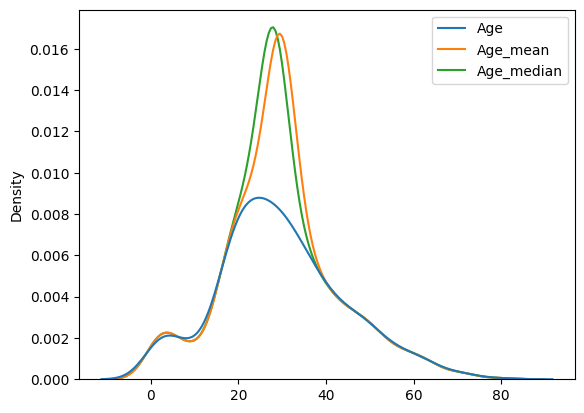

In [ ]:
df2=df.drop(columns=['Fare','Survived'])
sns.kdeplot(df2)





In [ ]:
df.cov()

,Survived,Age,Fare,Age_mean,Age_median
Survived,0.236772,-0.551296,6.221787,-0.441656,-0.411226
Age,-0.551296,211.019125,73.849030,211.019125,211.019125
Fare,6.221787,73.849030,2469.436846,59.162200,62.556767
Age_mean,-0.441656,211.019125,59.162200,169.052400,169.052400
Age_median,-0.411226,211.019125,62.556767,169.052400,169.512498


In [ ]:
df.corr()

,Survived,Age,Fare,Age_mean,Age_median
Survived,1.000000,-0.077221,0.257307,-0.069809,-0.064910
Age,-0.077221,1.000000,0.096067,1.000000,1.000000
Fare,0.257307,0.096067,1.000000,0.091566,0.096688
Age_mean,-0.069809,1.000000,0.091566,1.000000,0.998642
Age_median,-0.064910,1.000000,0.096688,0.998642,1.000000


<Axes: >

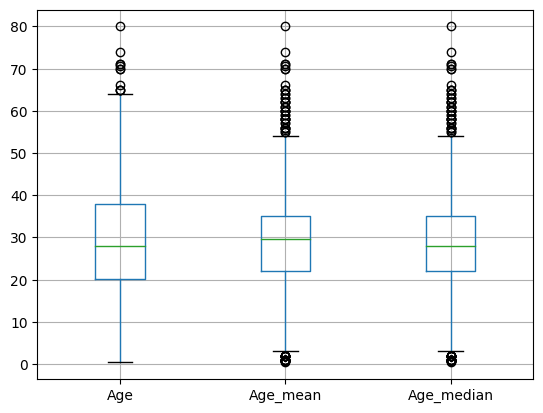

In [ ]:
df[['Age','Age_mean','Age_median']].boxplot()

# observation:- showing so much Outliear

# using Skit learn for imputation

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df=df.drop(columns=['Age_mean','Age_median'])
y=df.iloc[:,0]
x=df.iloc[:,1:3]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# numerical_columns
num=[1]
num_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

preprocess=ColumnTransformer(transformers=[('num_transform',num_transform,num)])

pipeline=Pipeline([
    ('preprocess',preprocess),
('tree',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  [1])])),
                ('tree', DecisionTreeClassifier())])

In [ ]:
y_pred=pipeline.predict(x_test)
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [ ]:
print('accuracy_score:-',accuracy_score(y_test,y_pred))

accuracy_score:- 0.6927374301675978
